In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Hierarchical

In the following part, we explore agglomerative hierarchical clustering on our dataset on Texas state.

In [106]:
incidents = pd.read_csv('../data/new_incidents.csv', low_memory=False)

def drop_state(df):
    df = df[df['state'] == "Texas"]
    return df

Texas = drop_state(incidents)

Texas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 12 to 183619
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    9759 non-null   object 
 1   state                   9759 non-null   object 
 2   city_or_county          9759 non-null   object 
 3   latitude                9759 non-null   float64
 4   longitude               9759 non-null   float64
 5   congressional_district  9681 non-null   float64
 6   avg_age_participants    9759 non-null   float64
 7   n_participants_adult    8968 non-null   float64
 8   n_males                 9210 non-null   float64
 9   n_females               9210 non-null   float64
 10  n_killed                9759 non-null   int64  
 11  n_injured               9759 non-null   int64  
 12  n_arrested              9759 non-null   int64  
 13  n_unharmed              9759 non-null   int64  
 14  n_participants          9759 non-null   in

# Features

These are the features that we use for hierarchical clustering

In [107]:
selected_features = ['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']
df_aux = Texas[selected_features]

# Normalization

We apply minmax normalization on our selected_features

In [108]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm, columns=df_aux.columns)

# COMPLETE METHOD

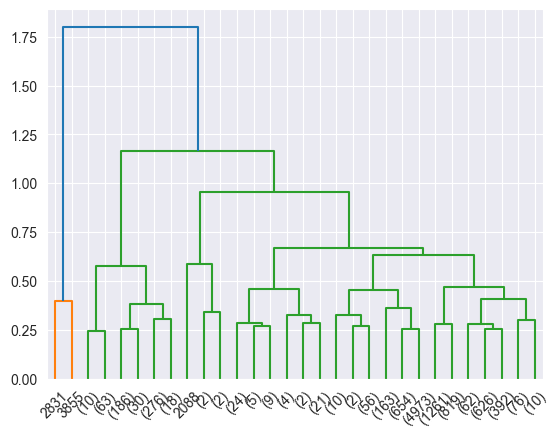

In [109]:
data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [110]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

0.8937616718981689


In [111]:
ndf['label'] = cluster.labels_
print(ndf.label.value_counts())

label
0    9757
1       2
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

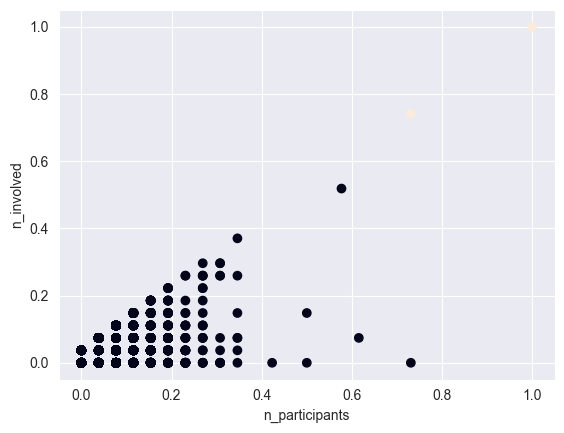

In [112]:
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

In [113]:
values= df_aux['n_involved'].value_counts()
print(values)

n_involved
1     5576
0     2736
2     1111
3      224
4       74
5       17
7        8
6        6
8        3
14       1
20       1
27       1
10       1
Name: count, dtype: int64


# COMPLETE METHOD N2

Let's try to redo the complete method without the two potential outliers

In [114]:
outliers_row= df_aux[df_aux['n_involved'] >= 20]
print(outliers_row)

df_nout = df_aux.drop([53171, 72096])

       n_participants  n_involved  age_to_average  par_to_tot
53171              20          20        1.225373    0.077220
72096              27          27        1.390964    0.087948


In [115]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout = scaler.fit_transform(df_nout.to_numpy())
ndf_nout = pd.DataFrame(df_norm_nout, columns=df_nout.columns)

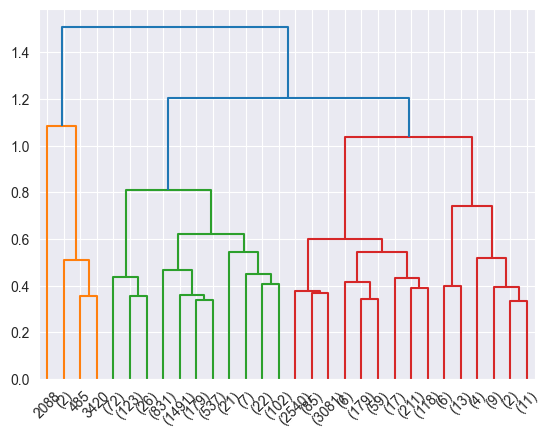

In [116]:
data_dist = pdist(df_norm_nout, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [117]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
cluster.fit_predict(df_norm_nout)
print(silhouette_score(df_norm_nout, cluster.labels_))

ndf_nout['label'] = cluster.labels_

print (ndf_nout.label.value_counts())

0.2864240442306957
label
1    6341
2    3411
0       5
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

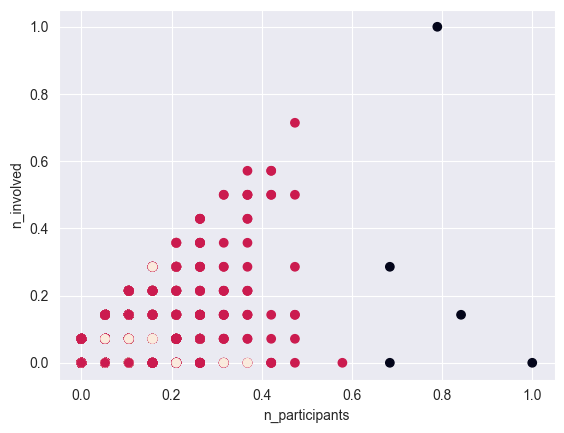

In [118]:
plt.scatter(ndf_nout['n_participants'], ndf_nout['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

# COMPLETE METHOD N3

Let's try to redo the complete method for the third time without the further potential outliers found, to understand how the method behaves in the presence of them and how much it is influenced by them

In [119]:
outliers_row= df_aux[df_aux['n_involved'] >= 8]
print(outliers_row)

df_nout2 = df_aux.drop([39577, 45086, 53171, 64674, 71602, 72096, 104475])

        n_participants  n_involved  age_to_average  par_to_tot
39577               16          14        1.258491    0.028623
45086                8           8        1.357845    0.015779
53171               20          20        1.225373    0.077220
64674                9           8        0.728600    0.035019
71602                9           8        0.728600    0.025862
72096               27          27        1.390964    0.087948
104475              10          10        0.927309    0.031250


In [120]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout2 = scaler.fit_transform(df_nout2.to_numpy())
ndf_nout2 = pd.DataFrame(df_norm_nout2, columns=df_nout2.columns)

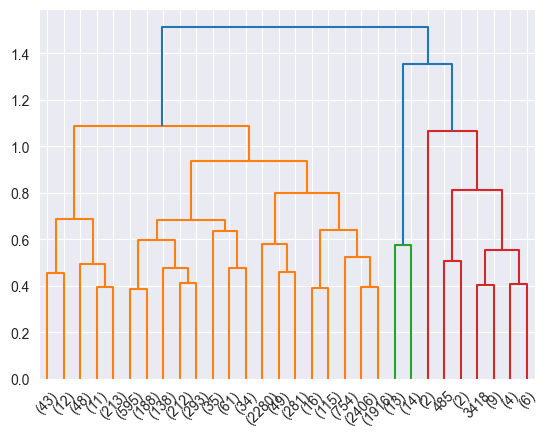

In [121]:
data_dist = pdist(df_norm_nout2, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [122]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
cluster.fit_predict(df_norm_nout2)
print(silhouette_score(df_norm_nout2, cluster.labels_))

ndf_nout2['label'] = cluster.labels_

print(ndf_nout2.label.value_counts())

0.6593710673829262
label
0    9700
2      27
1      25
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

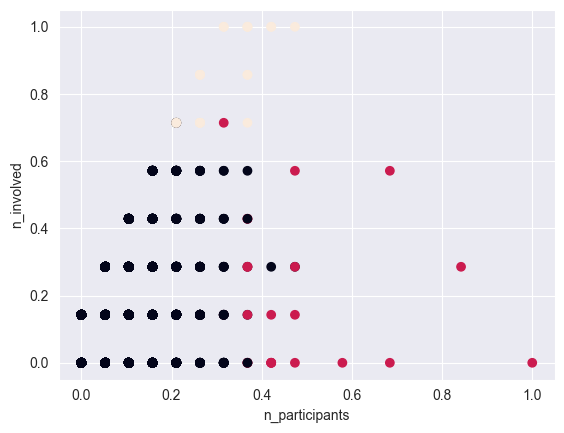

In [123]:
plt.scatter(ndf_nout2['n_participants'], ndf_nout2['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

Text(0, 0.5, 'n_involved')

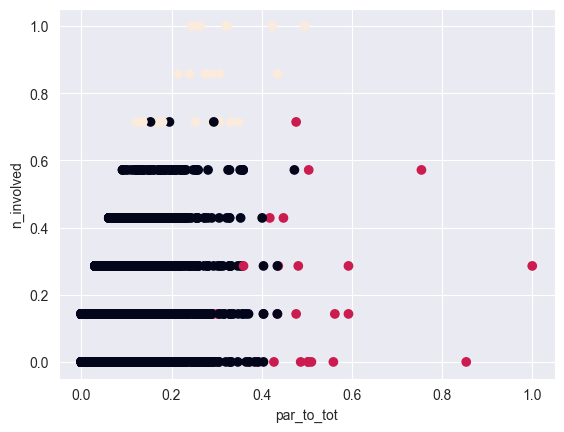

In [124]:
plt.scatter(ndf_nout2['par_to_tot'], ndf_nout2['n_involved'], c=cluster.labels_)
plt.xlabel('par_to_tot')
plt.ylabel('n_involved')

# SINGLE METHOD

We saw for the previous method how the results change by inserting or removing a few values, so we decided to do the same thing for the average method and the single method too

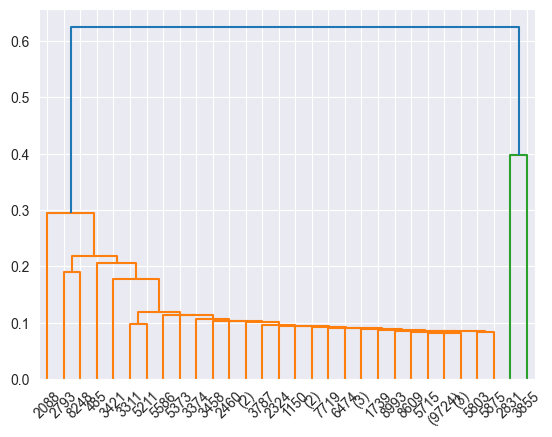

In [125]:
#dendogram1
data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.42, truncate_mode='lastp')

In [126]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

ndf['label'] = cluster.labels_

print(ndf.label.value_counts())

0.8937616718981689
label
1    9757
0       2
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

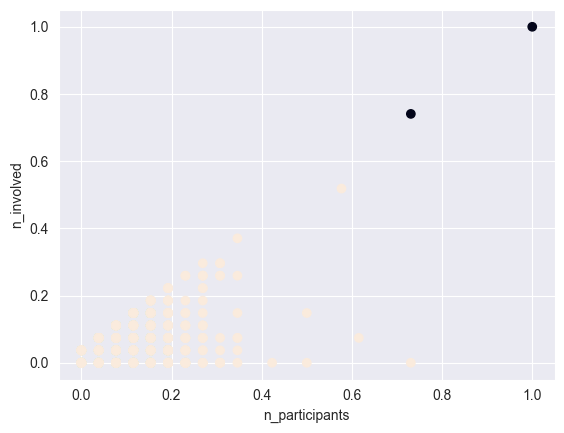

In [127]:
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

# SINGLE METHOD 2

In [128]:
df_nout = df_aux.drop([53171, 72096])

In [129]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout = scaler.fit_transform(df_nout.to_numpy())
ndf_nout = pd.DataFrame(df_norm_nout, columns=df_nout.columns)

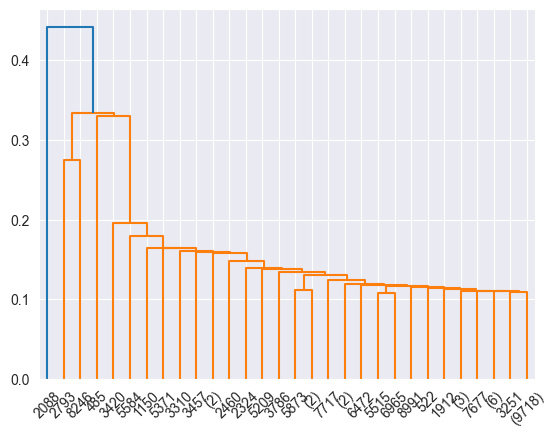

In [130]:
data_dist = pdist(df_norm_nout, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.42, truncate_mode='lastp')

In [131]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
cluster.fit_predict(df_norm_nout)
print(silhouette_score(df_norm_nout, cluster.labels_))

ndf_nout['label'] = cluster.labels_

print(ndf_nout.label.value_counts())

0.8487214766068664
label
0    9756
1       1
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

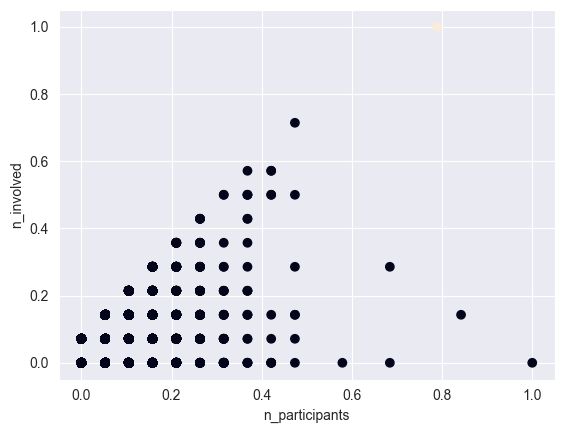

In [132]:
plt.scatter(ndf_nout['n_participants'], ndf_nout['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

# SINGLE METHOD 3

In [133]:
outliers_row = df_aux[df_aux['n_involved'] >= 8]
print(outliers_row)

df_nout2 = df_aux.drop([39577, 53171, 72096])

        n_participants  n_involved  age_to_average  par_to_tot
39577               16          14        1.258491    0.028623
45086                8           8        1.357845    0.015779
53171               20          20        1.225373    0.077220
64674                9           8        0.728600    0.035019
71602                9           8        0.728600    0.025862
72096               27          27        1.390964    0.087948
104475              10          10        0.927309    0.031250


In [134]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout2 = scaler.fit_transform(df_nout2.to_numpy())
ndf_nout2 = pd.DataFrame(df_norm_nout2, columns=df_nout2.columns)

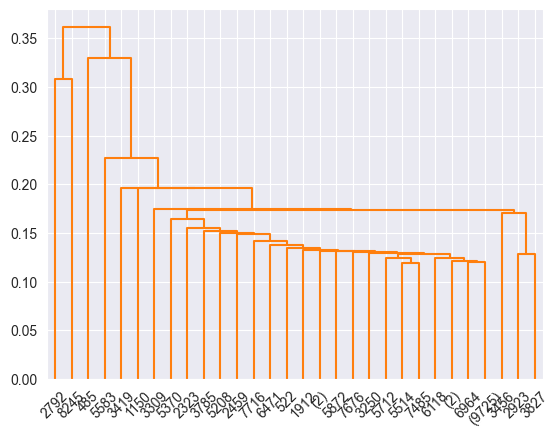

In [135]:
data_dist = pdist(df_norm_nout2, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.42, truncate_mode='lastp')

# AVERAGE METHOD

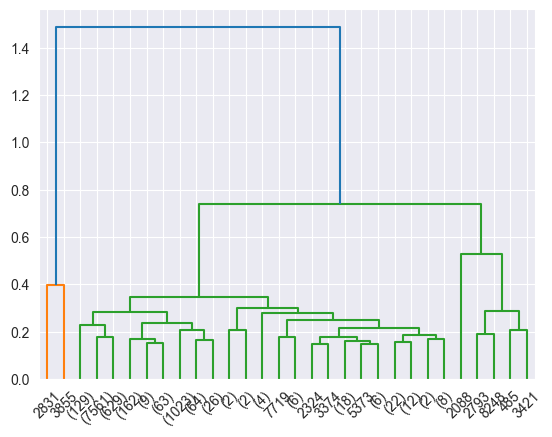

In [136]:
#dendogram1
data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [137]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

ndf['label'] = cluster.labels_

print(ndf.label.value_counts())

0.8937616718981689
label
0    9757
1       2
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

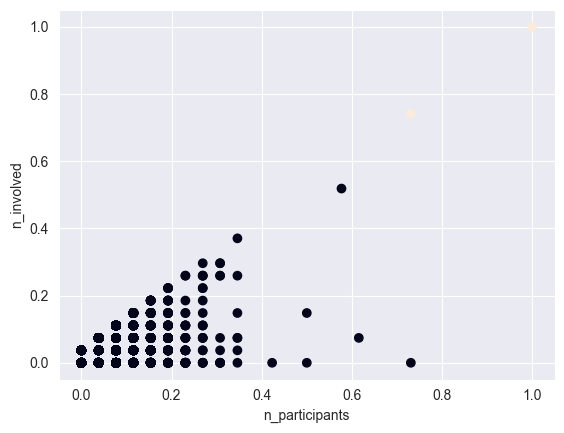

In [138]:
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

# AVERAGE METHOD 2

In [139]:
df_nout = df_aux.drop([53171, 72096])

In [140]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout = scaler.fit_transform(df_nout.to_numpy())
ndf_nout = pd.DataFrame(df_norm_nout, columns=df_nout.columns)

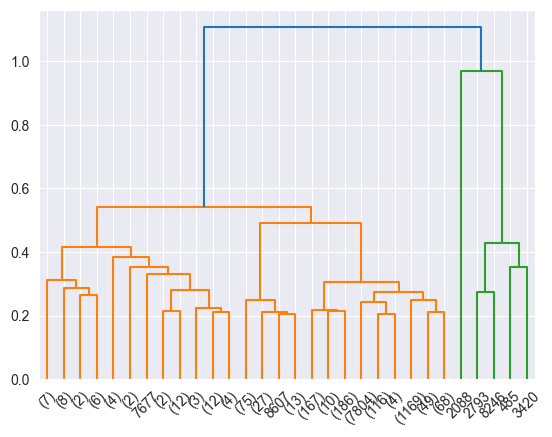

In [141]:
data_dist = pdist(df_norm_nout, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

In [142]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
cluster.fit_predict(df_norm_nout)
print(silhouette_score(df_norm_nout, cluster.labels_))

ndf_nout['label'] = cluster.labels_

print(ndf_nout.label.value_counts())

0.8257861668902405
label
1    9752
0       5
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

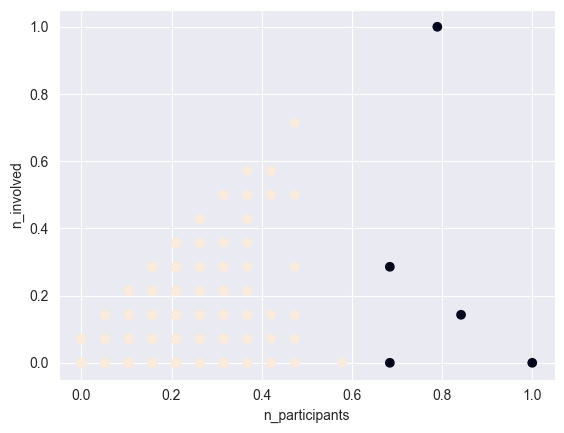

In [143]:
plt.scatter(ndf_nout['n_participants'], ndf_nout['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

# AVERAGE METHOD 3

In [144]:
df_nout2 = df_aux.drop([39577, 45086, 53171, 64674, 71602, 72096, 104475])

In [145]:
#Normalization
scaler = MinMaxScaler()
df_norm_nout2 = scaler.fit_transform(df_nout2.to_numpy())
ndf_nout2 = pd.DataFrame(df_norm_nout2, columns=df_nout2.columns)

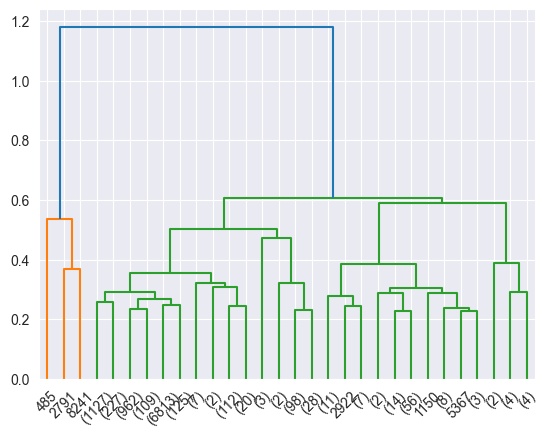

In [146]:
data_dist = pdist(df_norm_nout2, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

In [147]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
cluster.fit_predict(df_norm_nout2)
print(silhouette_score(df_norm_nout2, cluster.labels_))

ndf_nout2['label'] = cluster.labels_

print (ndf_nout2.label.value_counts())

0.8062353265935247
label
0    9749
1       3
Name: count, dtype: int64


Text(0, 0.5, 'n_involved')

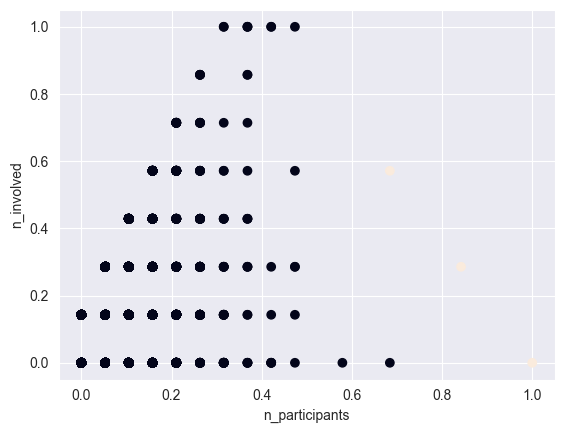

In [148]:
plt.scatter(ndf_nout2['n_participants'], ndf_nout2['n_involved'], c=cluster.labels_)
plt.xlabel('n_participants')
plt.ylabel('n_involved')

Text(0, 0.5, 'n_involved')

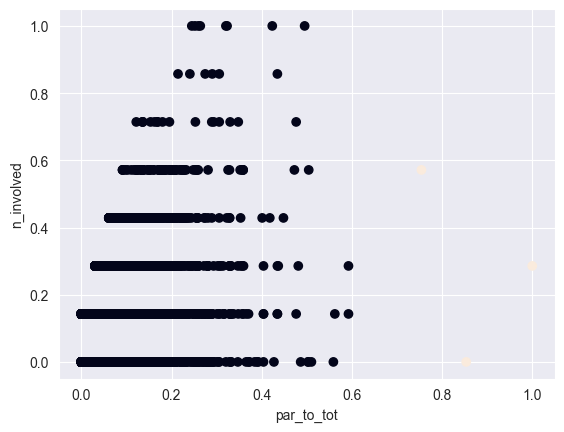

In [149]:
plt.scatter(ndf_nout2['par_to_tot'], ndf_nout2['n_involved'], c=cluster.labels_)
plt.xlabel('par_to_tot')
plt.ylabel('n_involved')

# WARD METHOD

In this case we do not do other checks on potential outliers and the robustness to them as we do not find any

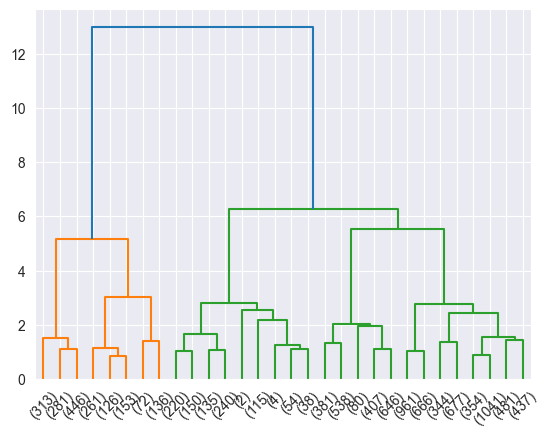

In [150]:
#dendogram1
data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=10.0, truncate_mode='lastp')

In [151]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

ndf['label'] = cluster.labels_

print (ndf.label.value_counts())

0.5252010649166791
label
0    7971
1    1788
Name: count, dtype: int64


Text(0, 0.5, 'par_to_tot')

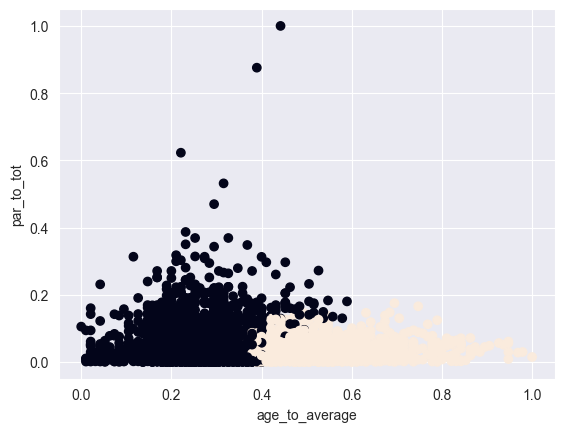

In [152]:
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster.labels_)
plt.xlabel('age_to_average')
plt.ylabel('par_to_tot')